# SVM

In [2]:
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use("ggplot")

# Load data
data = np.loadtxt("microchip.txt",delimiter=',')
X = data[:,:2]
y = data[:,2]

print(X.shape)
print(y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


(118, 2)
(118,)


In [3]:
# Generate and fit SVM model

clf = svm.SVC()
clf.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
clf.predict([[.25,.25]])

array([1.])

In [5]:
clf.predict([[1,1]])

array([0.])

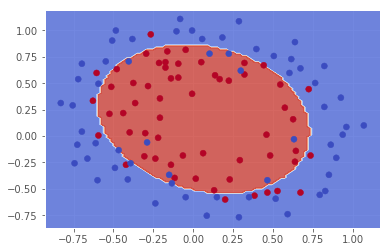

In [6]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


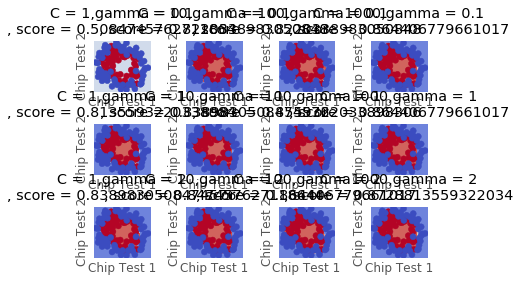

In [8]:

#%matplotlib tk 

C = [1, 10, 100, 1000]
G = [0.1, 1,2]

for j,g in enumerate(G):
    for i,c in enumerate(C):

        # Generate and fit SVM model
        clf = svm.SVC(C = c, gamma= g)
        clf.fit(X, y) 

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(len(G), len(C), i + (len(C)*j) + 1)
        plt.subplots_adjust(wspace=0.6, hspace=0.6)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Chip Test 1')
        plt.ylabel('Chip Test 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title("C = "+ str(c) + ",gamma = " + str(g) + "\n, score = " + str(float(clf.score(X,y))))
 
plt.show()